In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [3]:
path='C:/Users/Administrator/Desktop/lstm/sunspots/sunspot_data.csv'

df = pd.read_csv(path, sep=';', names=['year','month','1','Sunspot','3','4','5'])

df['Date'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str), format='%Y%m')
df=df.drop(columns=['year','month','1','3','4','5'])
df

,Sunspot,Date
0,96.7,1749-01-01
1,104.3,1749-02-01
2,116.7,1749-03-01
3,92.8,1749-04-01
4,141.7,1749-05-01
...,...,...
3286,77.6,2022-11-01
3287,113.1,2022-12-01
3288,143.6,2023-01-01
3289,110.9,2023-02-01


In [4]:
def prepare_data(data, n_in=1, n_out=1):
    X, y = [], []
    for i in range(len(data)-n_in-n_out):
        X.append(data[i:i+n_in])
        y.append(data[i+n_in:i+n_in+n_out])
    return np.array(X), np.array(y)

In [6]:
n_steps = 60
train_data = df[:int(len(df)*0.8)]
test_data = df[int(len(df)*0.8):]
train_X, train_y = prepare_data(train_data['Sunspot'].values, n_steps)
test_X, test_y = prepare_data(test_data['Sunspot'].values, n_steps)


In [26]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model.fit(train_X, train_y, epochs=100, batch_size=64, validation_data=(test_X, test_y), verbose=1)

Epoch 1/100
41/41 [==============================] - 7s 81ms/step - loss: 31843.4473 - val_loss: 20506.3945
Epoch 2/100
41/41 [==============================] - 2s 56ms/step - loss: 28295.4688 - val_loss: 52611.3594
Epoch 3/100
41/41 [==============================] - 2s 54ms/step - loss: 36350.4648 - val_loss: 36739.2461
Epoch 4/100
41/41 [==============================] - 2s 52ms/step - loss: 20558.1992 - val_loss: 14535.7656
Epoch 5/100
41/41 [==============================] - 2s 58ms/step - loss: 13442.7305 - val_loss: 12421.7822
Epoch 6/100
41/41 [==============================] - 2s 52ms/step - loss: 12304.9268 - val_loss: 12711.8984
Epoch 7/100
41/41 [==============================] - 2s 57ms/step - loss: 11754.4248 - val_loss: 12567.0410
Epoch 8/100
41/41 [==============================] - 2s 54ms/step - loss: 11410.7285 - val_loss: 12182.2480
Epoch 9/100
41/41 [==============================] - 3s 62ms/step - loss: 11212.1572 - val_loss: 12893.4102
Epoch 10/100
41/41 [========

In [27]:
test_pred = model.predict(test_X)
len(test_pred)

19/19 [==============================] - 1s 14ms/step


598

<function matplotlib.pyplot.show(close=None, block=None)>

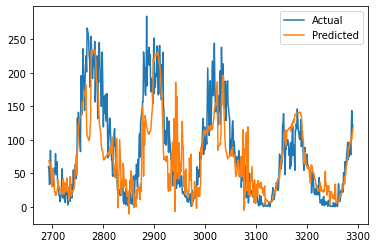

In [29]:
plt.plot(test_data.index[n_steps:], test_data['Sunspot'][n_steps:], label='Actual')
plt.plot(test_data.index[n_steps+1:], test_pred[:,0], label='Predicted')
plt.legend()
plt.show